In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from pathlib import Path 

In [4]:
PROCESSED_DATA=Path("../data/processed/cleaned_train.csv").resolve()

In [5]:
df=pd.read_csv(PROCESSED_DATA)

In [6]:
df.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [8]:
cols=  df.columns.to_list()
cols

['road_type',
 'num_lanes',
 'curvature',
 'speed_limit',
 'lighting',
 'weather',
 'road_signs_present',
 'public_road',
 'time_of_day',
 'holiday',
 'school_season',
 'num_reported_accidents',
 'accident_risk']

In [9]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()
num_cols

['num_lanes',
 'curvature',
 'speed_limit',
 'num_reported_accidents',
 'accident_risk']

In [10]:
cat_cols= list(set(cols)-set(num_cols))
cat_cols

['time_of_day',
 'road_signs_present',
 'lighting',
 'road_type',
 'weather',
 'school_season',
 'public_road',
 'holiday']

# Univarariate EDA

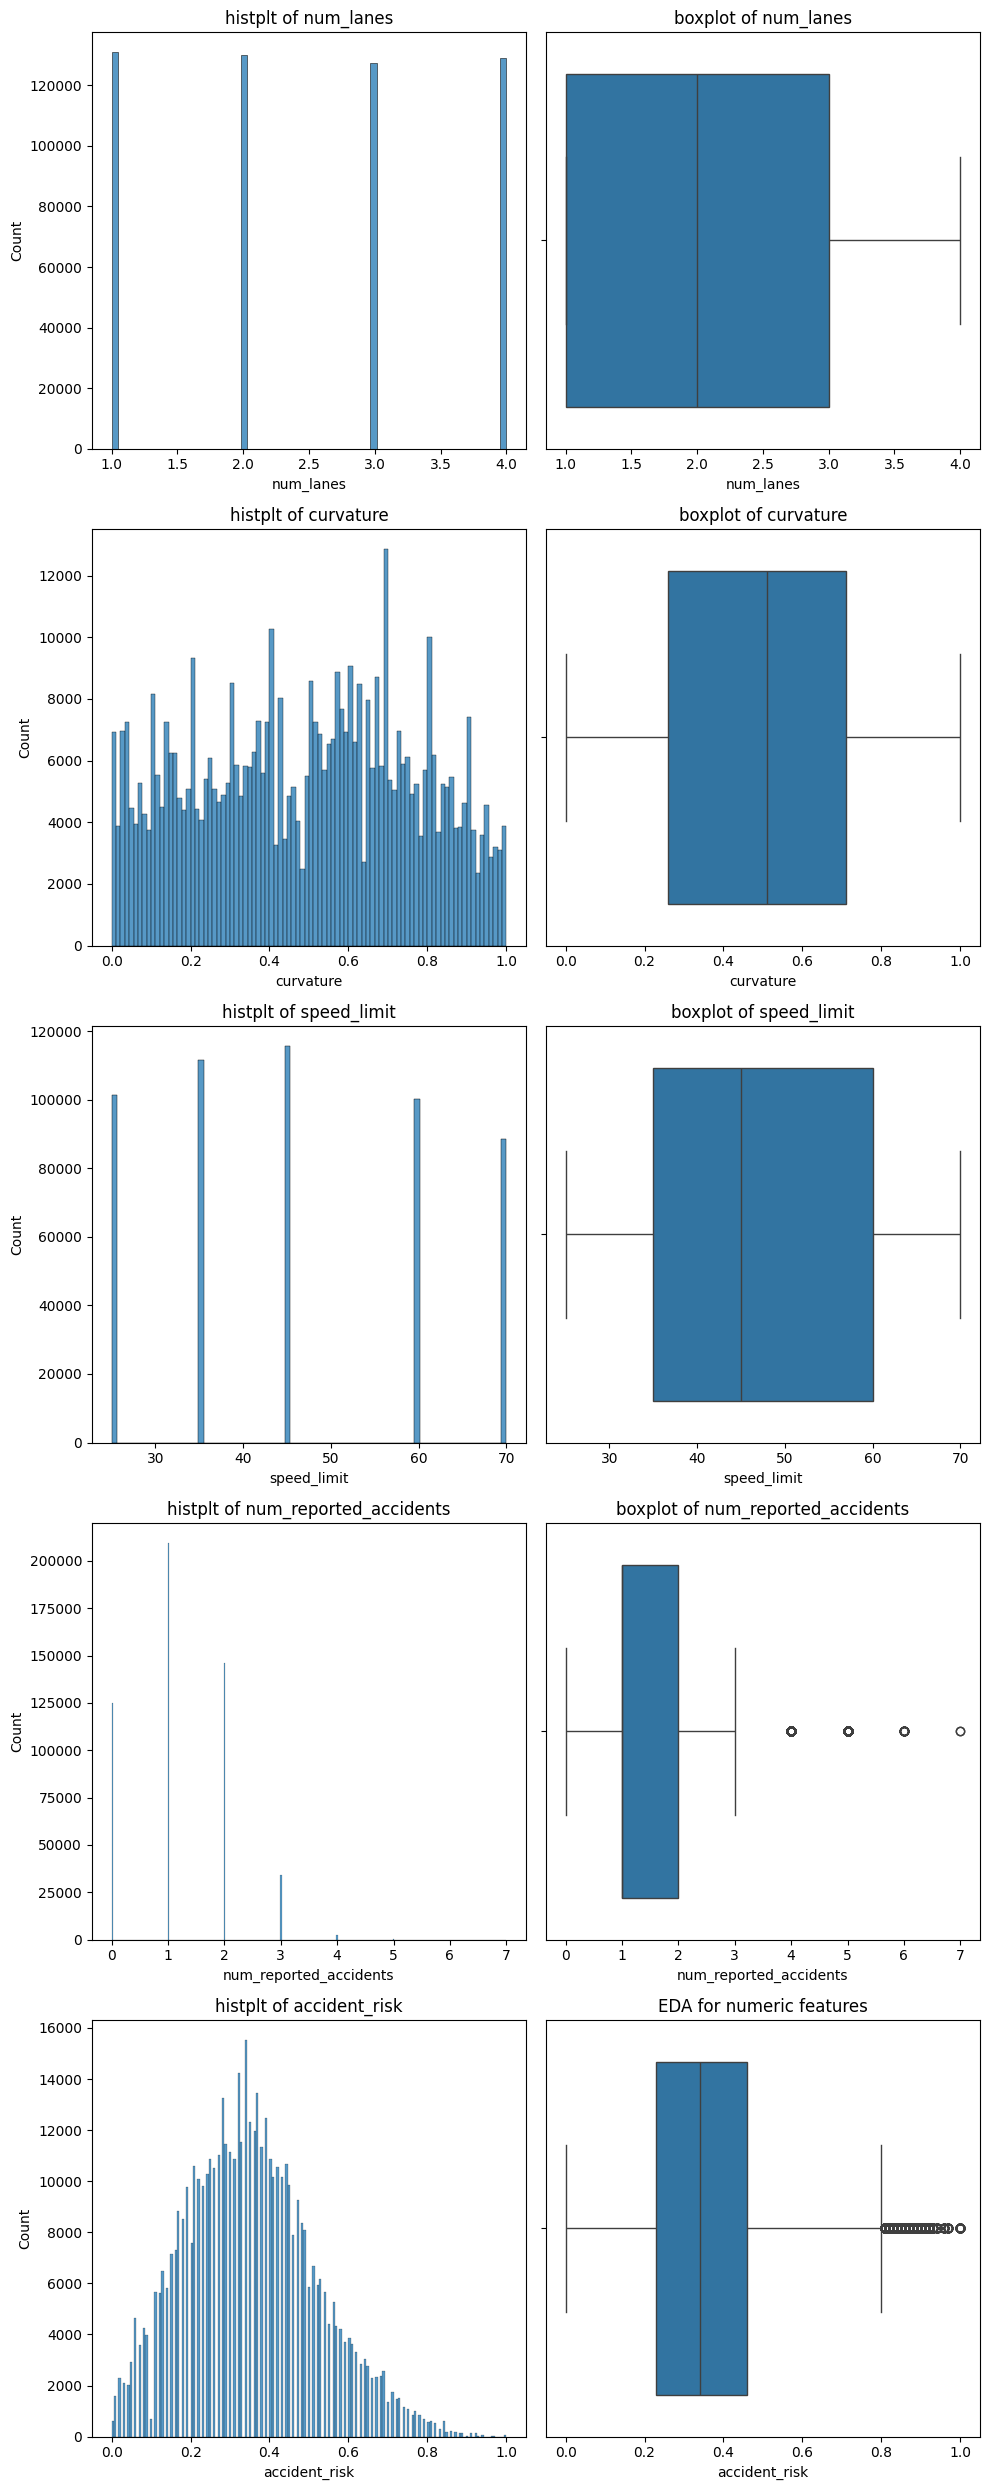

In [15]:
fig ,axis = plt.subplots(len(num_cols),2,figsize=(10,len(num_cols)*5))
for i ,col in enumerate(num_cols):
    sns.histplot(df,x=col,ax=axis[i,0])
    axis[i,0].set_title(f"histplt of {col}")
    sns.boxplot(df,x=col,ax=axis[i,1])
    axis[i,1].set_title(f"boxplot of {col}")

plt.title("EDA for numeric features")
fig.tight_layout()

    



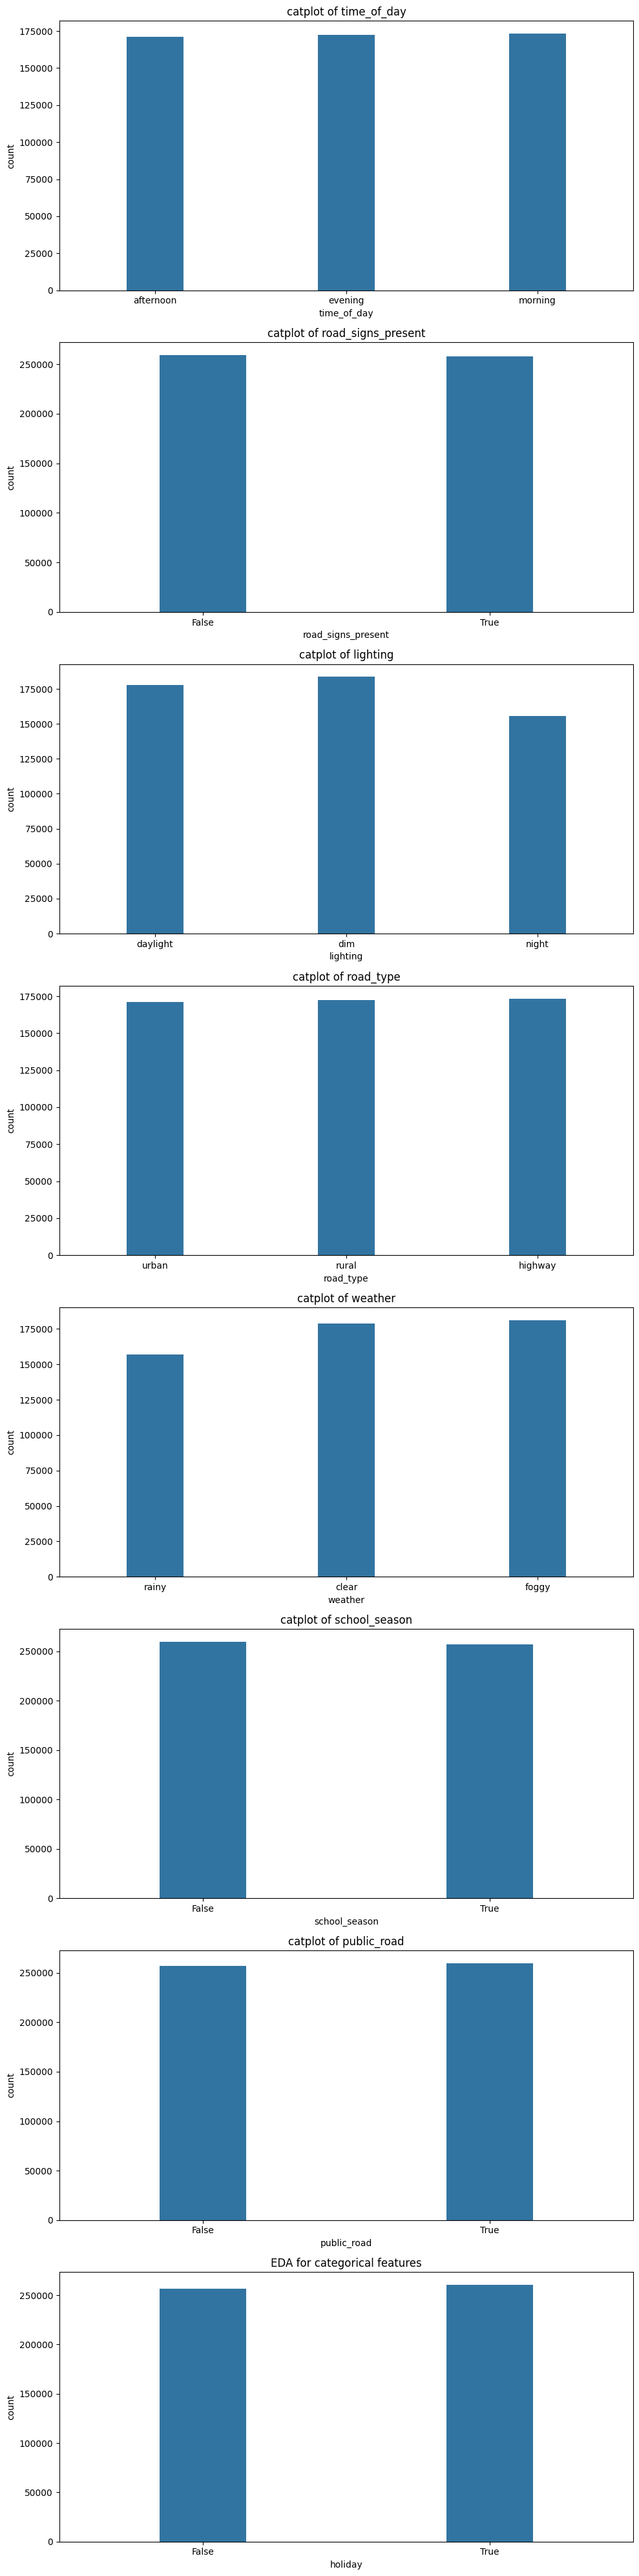

In [18]:
fig ,axis = plt.subplots(len(cat_cols),1,figsize=(10,len(cat_cols)*5))
axis=axis.flatten()
for i ,col in enumerate(cat_cols):
    sns.countplot(df,x=col,ax=axis[i],width=0.3)
    axis[i].set_title(f"catplot of {col}")

plt.title("EDA for categorical features")
fig.tight_layout()

<Axes: ylabel='accident_risk'>

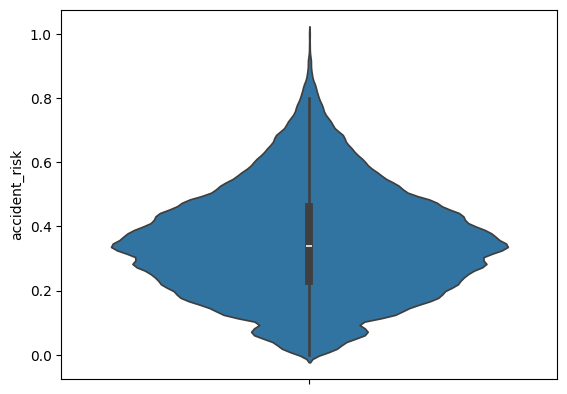

In [ ]:
sns.violinplot(df,y='accident_risk',)

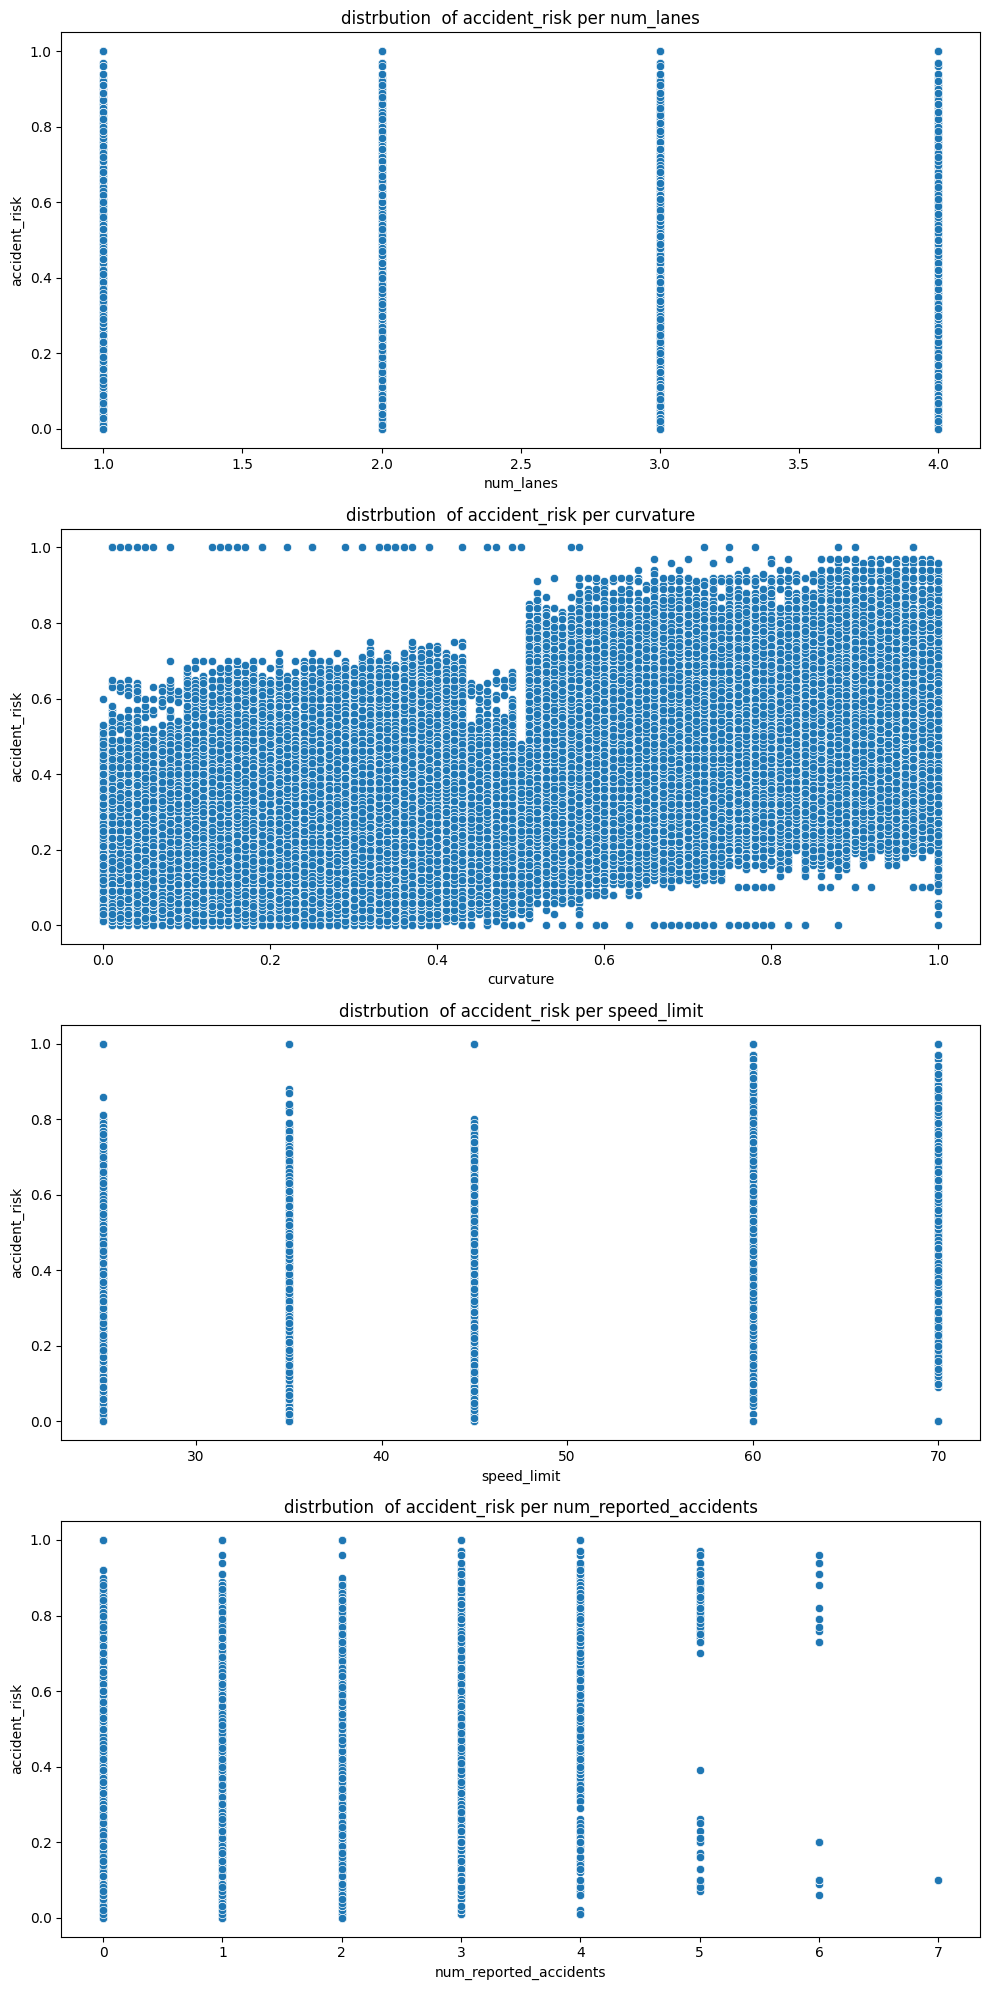

In [ ]:
fig ,axis = plt.subplots(len(num_cols)-1,1,figsize=(10,(len(num_cols)-1)*5))
axis=axis.flatten()

for i ,col in enumerate(num_cols):
    if col == 'accident_risk':
        continue
    sns.scatterplot(df,x=col,y='accident_risk',ax=axis[i])
    axis[i].set_title(f"distrbution  of accident_risk per {col}")

fig.tight_layout()
plt.show()

In [ ]:
fig ,axis = plt.subplots(len(num_cols)-1,1,figsize=(10,(len(num_cols)-1)*5))
axis=axis.flatten()
for i ,col in enumerate(num_cols):
    if col == 'accident_risk':
        continue
    sns.scatterplot(df,x=col,y='accident_risk',ax=axis[i])
    axis[i].set_title(f"distrbution  of accident_risk per {col}")
plt.title("accident_risk per all numeric features")
fig.tight_layout()
plt.show